In [301]:
import pandas as pd
import numpy as np

df = pd.read_csv("social media influencers - youtube.csv")

df.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


In [302]:
df.describe()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
count,1000,1000,723,1000,839,1000,962,791
unique,998,998,23,228,27,743,615,420
top,PrestonPlayz,Bollywood Classics,Music & Dance,10.1M,United States,1.1M,1.2K,1.8K
freq,2,2,224,34,291,18,17,14


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   youtuber name     1000 non-null   object
 1   channel name      1000 non-null   object
 2   Category          723 non-null    object
 3   Subscribers       1000 non-null   object
 4   Audience Country  839 non-null    object
 5   avg views         1000 non-null   object
 6   avg likes         962 non-null    object
 7   avg comments      791 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB


In [304]:
df.rename(columns = {'youtuber name': 'youtuber_name', 'channel name': 'channel_name', 'Category': 'category', 'Subscribers': 'subscribers', 'Audience Country': 'audience_country', 'avg views': 'average_views', 'avg likes': 'average_likes', 'avg comments': 'average_comments'}, inplace = True)

In [305]:
df.drop_duplicates(subset=['youtuber_name'])

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K
...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9.2M,Brazil,1.4M,110.1K,2.5K
996,EL GATO,EL GATO,Toys,9.2M,Brazil,243.8K,30.7K,636
997,CinemaSins,CinemaSins,Movies,9.2M,United States,296K,10.2K,874
998,CricketICC,ICC,Sports,9.2M,India,15.2K,854,58


In [306]:
df = df.fillna('No Data')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   youtuber_name     1000 non-null   object
 1   channel_name      1000 non-null   object
 2   category          1000 non-null   object
 3   subscribers       1000 non-null   object
 4   audience_country  1000 non-null   object
 5   average_views     1000 non-null   object
 6   average_likes     1000 non-null   object
 7   average_comments  1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [307]:
df.columns

Index(['youtuber_name', 'channel_name', 'category', 'subscribers',
       'audience_country', 'average_views', 'average_likes',
       'average_comments'],
      dtype='object')

In [308]:
for i in df.columns:
        if i != 'youtuber_name' and i != 'channel_name' and i != 'category' and i != 'audience_country':
            df[i] = df[i].replace({'No Data': '1234567890', 'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)


In [309]:
df['average_likes'] = df['average_likes'].replace({1234567890: np.nan})
df['average_comments'] = df['average_comments'].replace({1234567890: np.nan})
df

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800.0,290.0
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000,No Data,13800000,80900.0,NaN
2,setindia,SET India,No Data,130400000,India,23600,314.0,21.0
3,PewDiePie,PewDiePie,Animation,111400000,United States,1400000,80800.0,4600.0
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000.0,67700.0
...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9200000,Brazil,1400000,110100.0,2500.0
996,EL GATO,EL GATO,Toys,9200000,Brazil,243800,30700.0,636.0
997,CinemaSins,CinemaSins,Movies,9200000,United States,296000,10200.0,874.0
998,CricketICC,ICC,Sports,9200000,India,15200,854.0,58.0


In [310]:
# Para los avg likes o avg comments q no tenian dato, los complete con el promedio

df['average_likes'] = df['average_likes'].fillna(int(round(df.average_likes.mean(), 0)))
df['average_comments'] = df['average_comments'].fillna(int(round(df.average_comments.mean(), 0)))
df

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800.0,290.0
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000,No Data,13800000,80900.0,3349.0
2,setindia,SET India,No Data,130400000,India,23600,314.0,21.0
3,PewDiePie,PewDiePie,Animation,111400000,United States,1400000,80800.0,4600.0
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000.0,67700.0
...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9200000,Brazil,1400000,110100.0,2500.0
996,EL GATO,EL GATO,Toys,9200000,Brazil,243800,30700.0,636.0
997,CinemaSins,CinemaSins,Movies,9200000,United States,296000,10200.0,874.0
998,CricketICC,ICC,Sports,9200000,India,15200,854.0,58.0


In [326]:
df['average_likes'] = df['average_likes'].astype(int)
df['average_comments'] = df['average_comments'].astype(int)
df

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000,No Data,13800000,80900,3349
2,setindia,SET India,No Data,130400000,India,23600,314,21
3,PewDiePie,PewDiePie,Animation,111400000,United States,1400000,80800,4600
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000,67700
...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9200000,Brazil,1400000,110100,2500
996,EL GATO,EL GATO,Toys,9200000,Brazil,243800,30700,636
997,CinemaSins,CinemaSins,Movies,9200000,United States,296000,10200,874
998,CricketICC,ICC,Sports,9200000,India,15200,854,58


In [311]:
df.describe(include = 'all')

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
count,1000,1000,1000,1.000000e+03,1000,1.000000e+03,1.000000e+03,1000.000000
unique,998,998,24,NaN,28,NaN,NaN,NaN
top,PrestonPlayz,Bollywood Classics,No Data,NaN,United States,NaN,NaN,NaN
freq,2,2,277,NaN,291,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.740430e+07,NaN,1.102656e+06,5.210981e+04,3348.919000
std,NaN,NaN,NaN,1.380312e+07,NaN,3.438304e+06,2.111486e+05,13585.326572
min,NaN,NaN,NaN,9.200000e+06,NaN,0.000000e+00,5.000000e+00,1.000000
25%,NaN,NaN,NaN,1.070000e+07,NaN,5.470000e+04,1.300000e+03,96.750000
50%,NaN,NaN,NaN,1.325000e+07,NaN,2.672500e+05,7.250000e+03,770.500000
75%,NaN,NaN,NaN,1.825000e+07,NaN,9.282000e+05,4.857500e+04,3349.000000


<AxesSubplot:xlabel='youtuber_name', ylabel='ratio_likes_comments'>

/Users/vale/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vale/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vale/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vale/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vale/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:137: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.c

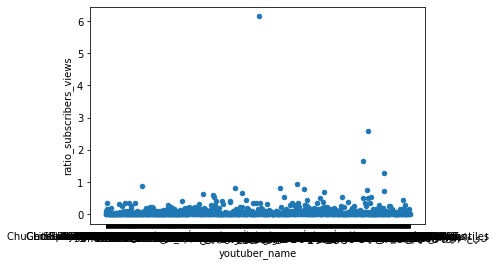

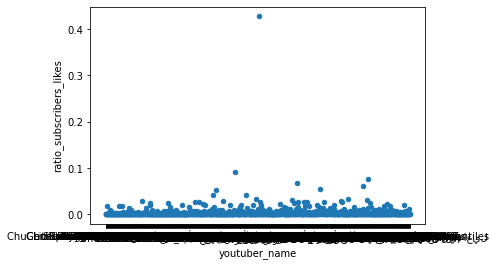

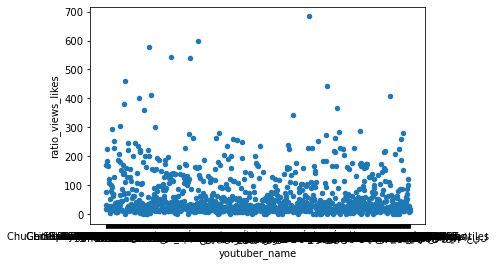

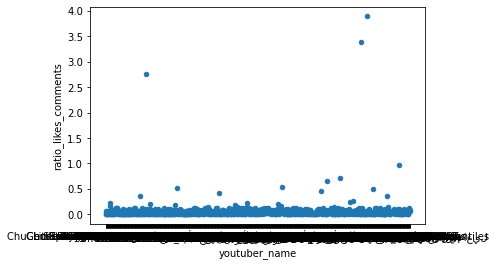

In [340]:
ratios = pd.DataFrame()

ratios['youtuber_name'] = df['youtuber_name']
ratios['ratio_subscribers_views'] = df['average_views']/df['subscribers']
ratios['ratio_subscribers_likes'] = df['average_likes']/df['subscribers']
ratios['ratio_views_likes'] = df['average_views']/df['average_likes']
ratios['ratio_likes_comments'] = df['average_likes']/df['average_views']

ratios.plot.scatter(x = 'youtuber_name', y = 'ratio_subscribers_views')
ratios.plot.scatter(x = 'youtuber_name', y = 'ratio_subscribers_likes')
ratios.plot.scatter(x = 'youtuber_name', y = 'ratio_views_likes')
ratios.plot.scatter(x = 'youtuber_name', y = 'ratio_likes_comments')

In [341]:

ratios_by_subscribers_views = ratios.sort_values('ratio_subscribers_views', ascending = False)
ratios_by_subscribers_views.head(5)


,youtuber_name,ratio_subscribers_views,ratio_subscribers_likes,ratio_views_likes,ratio_likes_comments
503,Bizarrap,6.145038,0.427481,14.375000,0.069565
862,whoisjimmy,2.575758,0.075788,33.986405,0.029424
844,вДудь,1.663366,0.060941,27.294882,0.036637
915,قناة وناسة - Wanasah TV,1.291667,0.008146,158.567775,0.006306
628,MORGENSHTERN,0.940171,0.067513,13.925813,0.071809


In [342]:
ratios_by_subscribers_likes = ratios.sort_values('ratio_subscribers_likes', ascending = False)
ratios_by_subscribers_likes.head(5)

,youtuber_name,ratio_subscribers_views,ratio_subscribers_likes,ratio_views_likes,ratio_likes_comments
503,Bizarrap,6.145038,0.427481,14.375000,0.069565
423,Harsh Beniwal,0.811189,0.090909,8.923077,0.112069
862,whoisjimmy,2.575758,0.075788,33.986405,0.029424
628,MORGENSHTERN,0.940171,0.067513,13.925813,0.071809
844,вДудь,1.663366,0.060941,27.294882,0.036637


In [343]:
ratios_by_views_likes = ratios.sort_values('ratio_views_likes', ascending = False)
ratios_by_views_likes.head(5)


,youtuber_name,ratio_subscribers_views,ratio_subscribers_likes,ratio_views_likes,ratio_likes_comments
667,htbhakti,0.009009,0.000013,683.221477,0.001464
303,D Billions,0.071006,0.000118,600.000000,0.001667
142,Genevieve's Playhouse - Learning Videos for Kids,0.009689,0.000017,576.585366,0.001734
215,Kids TV - Nursery Rhymes And Baby Songs,0.008798,0.000016,544.375000,0.001837
277,SockeyeMedia,0.004583,0.000009,538.255034,0.001858


In [344]:
ratios_by_likes_comments = ratios.sort_values('ratio_likes_comments', ascending = False)
ratios_by_likes_comments.head(5)


,youtuber_name,ratio_subscribers_views,ratio_subscribers_likes,ratio_views_likes,ratio_likes_comments
526,MrBeast Shorts,0.0,0.004040,0.0,inf
690,Rauw Alejandro,0.0,0.004695,0.0,inf
124,taylorgangent,0.0,0.002004,0.0,inf
519,Fun For Kids TV - Hindi Rhymes,0.0,0.004040,0.0,inf
407,Drawblogs,0.0,0.003594,0.0,inf


<AxesSubplot:xlabel='Country'>

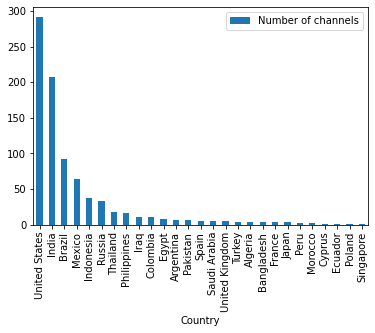

In [316]:
countries = set()
for country in df['audience_country']:
    if country != 'No Data':
        countries.add(country)
countries
    
channels_per_country = {}
for country in countries:
    channels_per_country[country] = 0
    for i in range(0, len(df)):
        if df['audience_country'][i] == country:
            channels_per_country[country] += 1

channels_per_country = pd.DataFrame(list(channels_per_country.items()),
                   columns=['Country', 'Number of channels'])

channels_per_country = channels_per_country.sort_values('Number of channels', ascending = False)

channels_per_country.plot.bar(x = 'Country', y = 'Number of channels')

<AxesSubplot:xlabel='Category'>

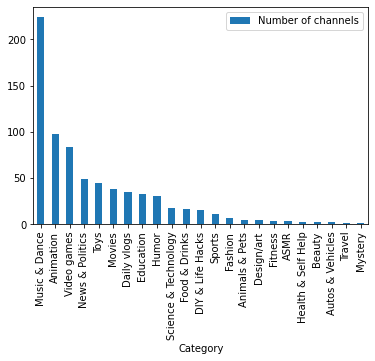

In [317]:
categories = set()
for category in df['category']:
    if category != 'No Data':
        categories.add(category)
    
channels_per_category = {}
for category in categories:
    channels_per_category[category] = 0
    for i in range(0, len(df)):
        if df['category'][i] == category:
            channels_per_category[category] += 1

channels_per_category = pd.DataFrame(list(channels_per_category.items()),
                   columns=['Category', 'Number of channels'])

channels_per_category = channels_per_category.sort_values('Number of channels', ascending = False)

channels_per_category.plot.bar(x = 'Category', y = 'Number of channels')

In [318]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [331]:
df_by_subscribers = df.sort_values('subscribers', ascending = False)
top_5_subscribers = df_by_subscribers.head(5)

top_5_subscribers

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132100000,No Data,13800000,80900,3349
2,setindia,SET India,No Data,130400000,India,23600,314,21
3,PewDiePie,PewDiePie,Animation,111400000,United States,1400000,80800,4600
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000,67700


In [330]:
df_by_views = df.sort_values('average_views', ascending = False)
top_5_views = df_by_views.head(5)

top_5_views

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
503,Bizarrap,Bizarrap,Music & Dance,13100000,Argentina,80500000,5600000,313600
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000,67700
862,whoisjimmy,How Ridiculous,Sports,9900000,United States,25500000,750300,5200
118,MrBeast Gaming,MrBeast Gaming,Animation,26500000,United States,23300000,732000,44000
844,вДудь,вДудь,News & Politics,10100000,Russia,16800000,615500,89400


In [329]:
df_by_likes = df.sort_values('average_likes', ascending = False)
top_5_likes = df_by_likes.head(5)

top_5_likes

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
503,Bizarrap,Bizarrap,Music & Dance,13100000,Argentina,80500000,5600000,313600
4,MrBeast6000,MrBeast,Video games,92500000,United States,30600000,1700000,67700
423,Harsh Beniwal,Harsh Beniwal,Movies,14300000,India,11600000,1300000,55400
363,Triggered Insaan,Triggered Insaan,Humor,15400000,India,6400000,800900,26500
628,MORGENSHTERN,MORGENSHTERN,Humor,11700000,Russia,11000000,789900,54800


In [328]:
df_by_comments = df.sort_values('average_comments', ascending = False)
top_5_comments = df_by_comments.head(5)
top_5_comments

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
503,Bizarrap,Bizarrap,Music & Dance,13100000,Argentina,80500000,5600000,313600
76,Desi Music Factory,Desi Music Factory,Music & Dance,32100000,India,10800000,396400,143600
924,Bispo Bruno Leonardo,Bispo Bruno Leonardo,Music & Dance,9600000,Brazil,577900,208700,139800
703,Jaiden Animations,Jaiden Animations,No Data,11100000,United States,5600000,602700,94300
844,вДудь,вДудь,News & Politics,10100000,Russia,16800000,615500,89400


In [323]:
df.describe(include = 'all')

,youtuber_name,channel_name,category,subscribers,audience_country,average_views,average_likes,average_comments
count,1000,1000,1000,1.000000e+03,1000,1.000000e+03,1.000000e+03,1000.000000
unique,998,998,24,NaN,28,NaN,NaN,NaN
top,PrestonPlayz,Bollywood Classics,No Data,NaN,United States,NaN,NaN,NaN
freq,2,2,277,NaN,291,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.740430e+07,NaN,1.102656e+06,5.210981e+04,3348.919000
std,NaN,NaN,NaN,1.380312e+07,NaN,3.438304e+06,2.111486e+05,13585.326572
min,NaN,NaN,NaN,9.200000e+06,NaN,0.000000e+00,5.000000e+00,1.000000
25%,NaN,NaN,NaN,1.070000e+07,NaN,5.470000e+04,1.300000e+03,96.750000
50%,NaN,NaN,NaN,1.325000e+07,NaN,2.672500e+05,7.250000e+03,770.500000
75%,NaN,NaN,NaN,1.825000e+07,NaN,9.282000e+05,4.857500e+04,3349.000000
